In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

# Part 1: Prepare the Data

In [2]:
#import csv file
p1 = "myopia.csv"
df = pd.read_csv(p1)
df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
df1 = df.drop(columns=['MYOPIC'])
df1.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0


# Part 2: Apply Dimensionality Reduction 

In [4]:
from sklearn.preprocessing import StandardScaler
#declare x
x = df1[[
    "AGE",
    "SPHEQ",
    "AL",
    "ACD",
    "LT",
    "VCD",
    "SPORTHR",
    "READHR",
    "COMPHR",
    "STUDYHR",
    "TVHR",
    "DIOPTERHR",
    "MOMMY",
    "DADMY"
]]
#standerdizing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [5]:
from sklearn.decomposition import PCA
#Dimensionality reduction
pca = PCA(n_components = 0.9)
ndata = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [6]:
ndf = pd.DataFrame(data = ndata, columns= ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"])
ndf.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183
5,-0.352605,2.019888,-0.006843,-1.415177,-0.759984,1.157975,0.740059,0.164110,1.250569,-1.401525
6,-0.335692,1.403542,-0.082447,-0.102080,-1.401532,0.737557,1.706826,-0.069387,0.388999,0.102258
7,-1.456695,-0.991883,1.001543,-0.731960,0.022628,-0.118257,-0.486553,-0.102932,-1.067021,-0.118232
8,-0.436809,-1.175823,2.003959,-0.223928,1.292552,1.011184,0.273048,0.377192,-0.145739,0.087149
9,-0.018199,0.552820,0.634571,-1.842772,-1.452535,-0.943217,0.103679,-1.057678,-0.794826,0.819197


In [7]:
from sklearn.manifold import TSNE
#Applying TSNE
tsne = TSNE(learning_rate = 50)
tsne_f = tsne.fit_transform(ndf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [8]:
tsne_f.shape

(618, 2)

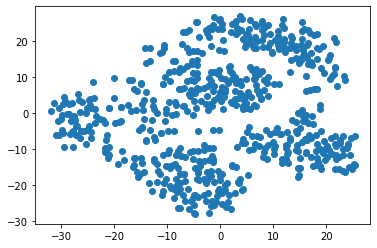

In [9]:
plt.scatter(tsne_f[:,0], tsne_f[:,1])
plt.show()

#### Based on the above visual, we can see up to 5 distinct clusters

# Part 3: Perform a Cluster Analysis with K-means

In [14]:
from sklearn.cluster import KMeans
#K - means
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_f)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,242966.656250
1,2,138009.890625
2,3,82103.789062
3,4,54470.609375
4,5,38819.386719


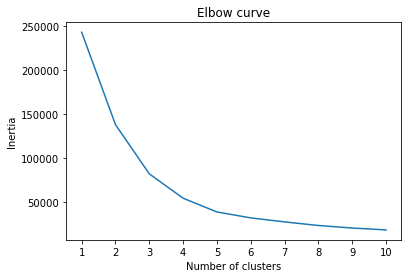

In [15]:
#Plotting the data to find the most efficient k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

#### Based on the Elbow curve, k = 5 would theoratically be the correct choice.

# Part 4: Make a Recommendation

##### Based on the above work, we can conclude that we can cluster patients into 5 main clusters.
##### As we scaled the data, and then we applied PCA, as well as TSNE, we made our data more focused on what we need, thus giving us a more reliable answer